# Housing Pricing Model Project

Learning Project to create a predictive housing price model with python based on existing house pricing data

## Step 1 - import packages

For the project we will be using `pandas`, `numpy`, `matplotlib`, and `seaborn` python packages

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2 - Load the data into a DataFrame

In [94]:
housing_data = pd.read_csv("./housing.csv")

## Step 3 - Explore the data

- Get a Quick view of the data - The Code below returns the first few rows of the data. We do this to get see the structure of the data

In [96]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Check for Missing Values: This step helps us identify if any columns have missing entries, which we might need to handle

In [98]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Drop any unavailable values from the data and preview it

In [102]:
housing_data.dropna(inplace = True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- Statistical Summary: This gives an overview of the dataset's numberical features

In [44]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Visualize Relationships: It's helpful to look at the correlations between features and the target variable (price) to see what might be useful for prediction. Use this heatmap to show correlations

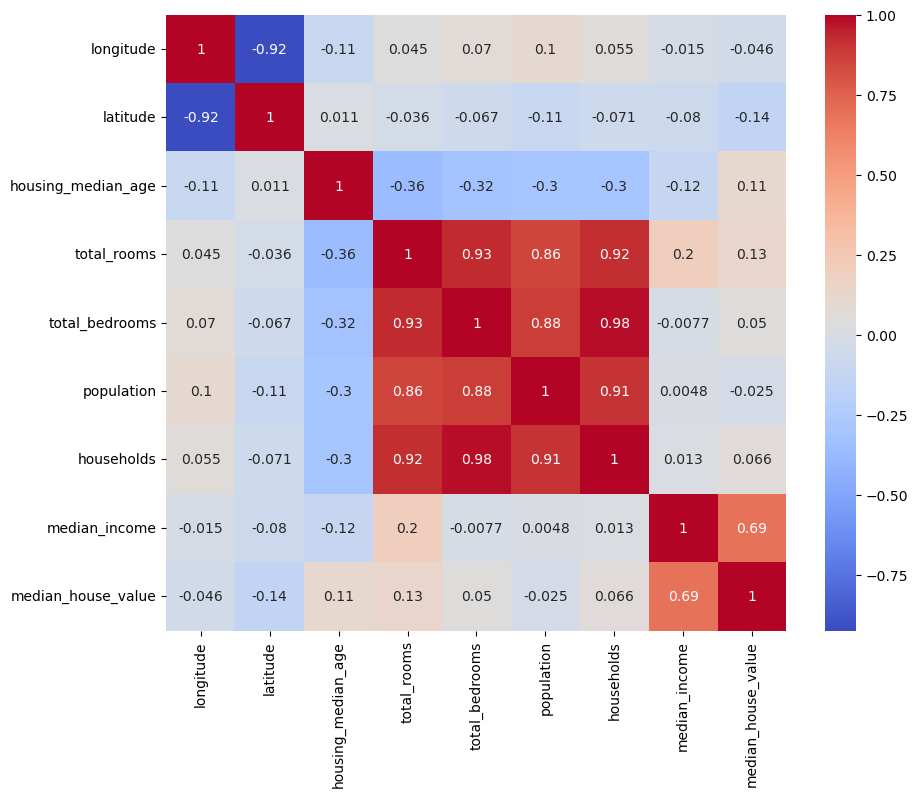

In [48]:
# Select only numberic columns for the correlation matrix
numeric_data = housing_data.select_dtypes(include=[np.number])

# Plot the heatmap with only numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 4: Prepare the Data for Modeling

Based on the heatmap, we choose the columns that seem most relevant for predicting house prices. These are:
- Total Rooms: The `total_rooms` column
- Total BedRooms: The `total_bedrooms` column
- Population: The `population` column
- Households: The `households` column

And we set those columns to the `X` axis, and `price` to the `Y` axis

In [73]:
X = housing_data[['median_income','total_rooms', 'house_median_age', 'households']]
y = housing_data['median_house_value']

Train-Test Split: Split the data to assess the models performance

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Previewing the data

In [81]:
X_test.isnull().sum()

total_rooms         0
total_bedrooms    207
population          0
households          0
dtype: int64

In [85]:
X_test.describe()

,total_rooms,total_bedrooms,population,households
count,4128.000000,3921.000000,4128.000000,4128.000000
mean,2610.796269,535.233104,1421.571705,497.750727
std,2209.359101,431.299704,1114.023136,387.770570
min,6.000000,2.000000,8.000000,2.000000
25%,1420.000000,294.000000,781.000000,278.000000
50%,2110.000000,428.000000,1160.000000,406.000000
75%,3099.250000,643.000000,1722.000000,598.000000
max,37937.000000,5471.000000,16122.000000,5189.000000


In [83]:
X_train.describe()

,total_rooms,total_bedrooms,population,households
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,2642.004784,538.496851,1426.453004,499.986919
std,2174.646744,419.007096,1137.056380,380.967964
min,2.000000,1.000000,3.000000,1.000000
25%,1454.000000,296.750000,789.000000,280.000000
50%,2129.000000,437.000000,1167.000000,410.000000
75%,3160.000000,647.000000,1726.000000,606.000000
max,39320.000000,6445.000000,35682.000000,6082.000000


Drop any non numerical / invalid values from the training and test data, then synchronize the Axes

In [110]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

## Step 5: Train a Linear Regression Model

1. Initialize and Train the Model

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

2. Get the Linear Regression equation and Make Predictions 

In [120]:
intercept = model.intercept_
coefficients = model.coef_

print("Linear Regression Equation:")
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f}) * x{i+1}"
print(equation)

Linear Regression Equation:
y = 201458.27 + (42.28) * x1 + (-308.51) * x2 + (-65.50) * x3 + (307.20) * x4


In [118]:
y_pred = model.predict(X_test)

# Step 6 - Evaluate the Model with RMSE (Root Mean Squared Error)

1. **Calculate RMSE**: This metric gives an idea of the average prediction error in the same units as the target variable (price)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 107260.63199206529


2. **Check R-Squared**: This metric shows how well the model explains the variance in the data

In [132]:
r2 = r2_score(y_test, y_pred)
print("R-squared", r2)

R-squared 0.12451405430032103


# Step 7 - Visualize the Model's Performance

Plotting True Values vs Predicted Values:

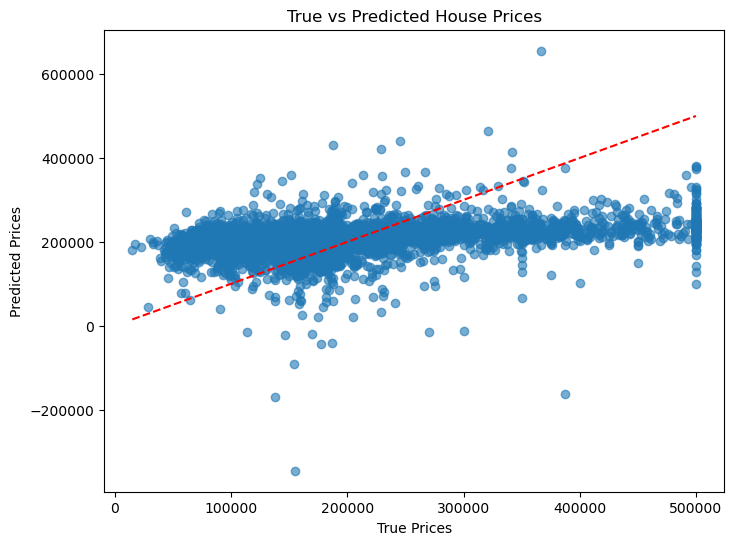

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted House Prices")
plt.show()

**Plot Residuals**: This plot shows the difference between the true and predicted values. Ideally, residuals should be randomly scattered around zero

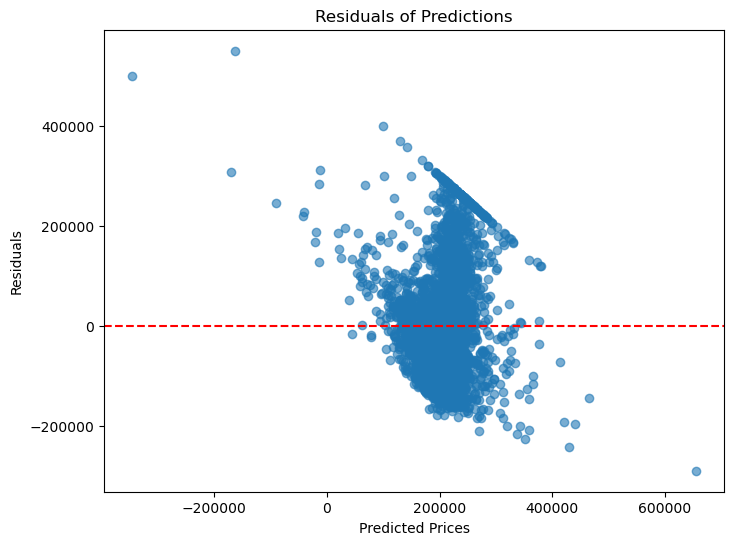

In [141]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals of Predictions")
plt.show()